# Finding Mountaintops Using Deep-Learning

## Model Implementation

#### created by [**Etzion Harari**](https://github.com/EtzionR)


## Imports:

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from os import remove
import imageio as img
import numpy as np

## Load data & model:


In [2]:
model = keras.models.load_model(r'Model\Mountaintops_model.h5')
data = np.load(r'Data\Rheinwaldhorn.npy')
r = data.shape[1]
c = data.shape[0]

## Show Data:

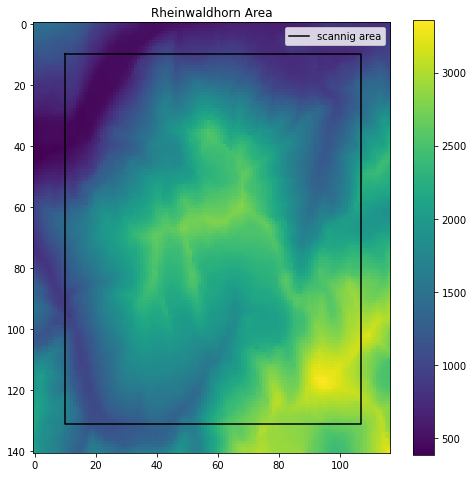

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(data)
plt.plot([10,r-10,r-10,10,10],[10,10,c-10,c-10,10], color='black', label='scannig area')
plt.title('Rheinwaldhorn Area')
plt.colorbar()
plt.legend()
plt.show()

## Data Processing:

In [4]:
idxs =[(i,j) for j in range(r) for i in range(c) if 9<i<c-10 and 9<j<r-10]
X = np.array([np.asarray(data[i-9:i+10,j-9:j+10]).astype(np.float64) for i,j in idxs])

## Applying the Model Prediction:

In [6]:
Y = np.round(model.predict(X),0)

## Results Processing:


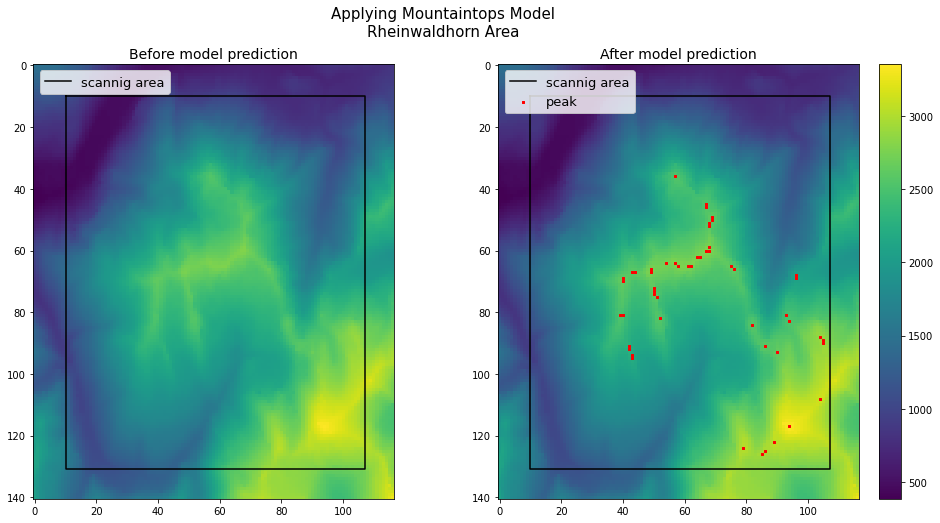

In [34]:
x_= [idxs[i][0] for i in range(len(idxs)) if Y[i]==1]
y_= [idxs[i][1] for i in range(len(idxs)) if Y[i]==1]
z_= [data[x_[k]][y_[k]] for k in range(len(x_))]
x,y,z = [],[],[]
for i in range(c):
    for j in range(r):
        x.append(i); y.append(j); z.append(data[i,j])
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(data)
ax1.plot([10,r-10,r-10,10,10],[10,10,c-10,c-10,10], color='black', label='scannig area')
ax1.set_title('Before model prediction',fontsize=14)
ax1.legend(loc='upper left',fontsize=13)

t=ax2.imshow(data)
ax2.scatter(y_,x_,c='red',s=2, marker='s',label='peak')
ax2.plot([10,r-10,r-10,10,10],[10,10,c-10,c-10,10], color='black', label='scannig area')
ax2.set_title('After model prediction',fontsize=14)
ax2.legend(loc='upper left',fontsize=13)

fig.suptitle('Applying Mountaintops Model\nRheinwaldhorn Area', fontsize=15)
fig.colorbar(t,ax=ax2,fraction=0.06)
plt.show()


## Results Ploting & Create 3D GIF:

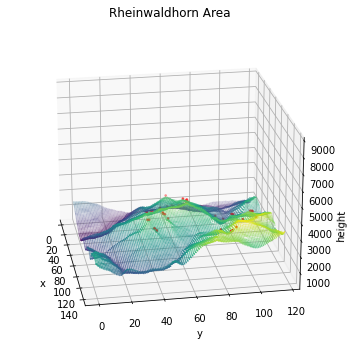

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z,c=z,s=0.1)
ax.scatter(x_, y_, np.array(z_)+100,c='red',s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('height')
ax.set_title('Rheinwaldhorn Area')
ax.set_zlim(190,9000)
plt.savefig(r'pictures\Rheinwaldhorn.png')

# 3D GIF
fr = 36
ang, pls, png = 0, (360 / fr), []
for i in range(int(fr)):
    ax.view_init(elev=22., azim=ang)
    png.append(str(ang) + '.png')
    plt.savefig(str(ang) + '.png')
    ang += pls

img.mimsave(r'pictures\Rheinwaldhorn.gif', [img.imread(i) for i in png])
for i in png: remove(i)